In [2]:
#------------------------------------------------------------------------------------------
# Pablo Marchesi
# Introduction to Econometrics
#------------------------------------------------------------------------------------------

# IMPORTS 
from scipy.stats import norm,t,f
import matplotlib.pyplot as plt
import numpy as np 
from turtle import color
import statsmodels.api as sm
import pandas as pd
import yfinance as yf

$$Week\,\,1:\,Normal\,\,Distribution$$
$$ X \sim \mathcal{N}(\mu,\,\sigma^{2})\$$

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)

In [3]:
#------------------------------------------------------------------------------------------
# NORMAL DISTRIBUTION
#------------------------------------------------------------------------------------------
# Find the probability of a value between a and b in a normal distribution
# By default distribution has mu = 0, and sigma = 1
#------------------------------------------------------------------------------------------

def normal(a, b, mu = 0,sigma= 1):

    x = np.arange(-5*sigma,5*sigma,0.1)
    area = np.arange(a,b,0.1)
    y = norm(mu,sigma).pdf(x)
    plt.plot(x,y); plt.xlabel('Values'); plt.ylabel('Probability')
    plt.fill_between(area,norm(mu,sigma).pdf(area), label= 'Probability')
    P = round((abs(norm.cdf(b,mu,sigma)-norm.cdf(a, mu, sigma))),4)
    plt.title(f'Probability between {a} and {b} is {P}'); plt.legend()
    return P 

$$Week\,\,2:\,Hypothesis\,\,Testing$$
$$ CI = \overline{x} \pm z\frac{s}{\sqrt{n}}\,\,\,\,\,\,\,\,\,\,\,\,\,\,Z\,test:\,Z = \frac{\hat{x}-\mu}{\sigma{}/\sqrt{n}}\,\,\,\,\,\,\,\,\,\,\,\,\,\,T\,test:\,t = \frac{\hat{x}-\mu}{s{}/\sqrt{n}}$$

In [4]:
#------------------------------------------------------------------------------------------
# Z-TEST 
#------------------------------------------------------------------------------------------
# Used to test the sample mean against the population mean
# Sample size > 30 (otherwise t-test)
# Standar deviation of the population must be known
# Data should be normally distributed
#------------------------------------------------------------------------------------------
def Ztest(sigma, mean, mu, n, alpha = 0.05, alternative = 'two-sided'):

    smaller = 0; greater = 0; noteq = 0; two = 0

    z = (mean-mu)*np.sqrt(n)/sigma

    x = np.arange(-5,5,0.1); y = norm.pdf(x)
    plt.plot(x,y); plt.xlabel('Standar Deviations From Mean'); plt.ylabel('Probability')

    if alternative == 'smaller':
        zcritic = norm.ppf(alpha)
        area = np.arange(-5,zcritic,0.1)
        smaller = zcritic > z
        plt.fill_between(area,norm.pdf(area), label = 'Rejection Region')


    elif alternative == 'greater':
        zcritic = norm.ppf(1-alpha)
        area = np.arange(zcritic,5,0.1)
        greater = zcritic < z  
        plt.fill_between(area,norm.pdf(area), label = 'Rejection Region')

    elif alternative == 'two-sided':
        two = 1
        zcritic = norm.ppf(alpha/2)
        zcritic1 = norm.ppf(1-alpha/2)
        zcritic2 = norm.ppf(alpha/2)
        noteq = (z<0)*(z<zcritic) or (z>0)*(z>zcritic)
        area1 = np.arange(zcritic1,5,0.1)
        area2 = np.arange(-5,zcritic2,0.1)
        plt.fill_between(area1,norm.pdf(area1), color = 'b')
        plt.fill_between(area2,norm.pdf(area2), color = 'b', label = 'Rejection Region')
        
    plt.scatter(z,0, label= f'Z-Test Result: {round(z,2)}'); plt.legend()
    
    if(smaller or greater or noteq):
        plt.title(f"Reject Null Hypothesis")
    else:
        plt.title("Fail to Reject Null Hypothesis (H1 is true)")
    
    if(two): print(f'Critical values: {round(zcritic,3)} and {round(-zcritic,3)}. Z-Test result is z = {round(z,3)}')
    else: print(f'Critical value: {round(zcritic,3)}. Z-Test result is z = {round(z,3)}')

#------------------------------------------------------------------------------------------
# T-TEST 
#------------------------------------------------------------------------------------------
# Like a Z-test but with unknown sigma (sample standar deviation needs to be calculated)
# For small sample size (<30)
# As n aproaches infinity, the T-Distribution approaches the Z-Distribution
# Data should be normally distributed
# Degrees of freedom (df) = sample size - 1
#------------------------------------------------------------------------------------------
def Ttest(s, mean, mu, n, alpha = 0.05, alternative = 'two-sided'):

    smaller = 0; greater = 0; noteq = 0; two = 0
    df = n - 1

    tval = (mean-mu)*np.sqrt(n)/s

    x = np.arange(-5,5,0.1); y = t.pdf(x,df)
    plt.plot(x,y); plt.xlabel('Standard Deviations From Mean'); plt.ylabel('Probability')

    if alternative == 'smaller':
        tcritic = t.ppf(alpha,df)
        area = np.arange(-5,tcritic,0.1)
        smaller = tcritic > tval
        plt.fill_between(area,t.pdf(area,df), label = 'Rejection Region')


    elif alternative == 'greater':
        tcritic = t.ppf(1-alpha,df)
        area = np.arange(tcritic,5,0.1)
        greater = tcritic < tval 
        plt.fill_between(area,t.pdf(area,df), label = 'Rejection Region')

    elif alternative == 'two-sided':
        two = 1
        tcritic = t.ppf(alpha/2,df)
        tcritic1 = t.ppf(1-alpha/2,df)
        tcritic2 = t.ppf(alpha/2,df)
        noteq = tval<tcritic2 or tval>tcritic1
        area1 = np.arange(tcritic1,5,0.1)
        area2 = np.arange(-5,tcritic2,0.1)
        plt.fill_between(area1,t.pdf(area1,df), color = 'b')
        plt.fill_between(area2,t.pdf(area2,df), color = 'b', label = 'Rejection Region')
        
    plt.scatter(tval,0, label= f'T-statistics: {round(tval,2)}'); plt.legend()
    
    if(smaller or greater or noteq):
        plt.title(f"Reject Null Hypothesis (H1 is true)")
    else:
        plt.title("Fail to Reject Null Hypothesis (uncertainty about Ho)") 
    
    if(two): print(f'Critical values: {round(tcritic,3)} and {round(-tcritic,3)}. T-statistics is t = {round(tval,3)}')
    else: print(f'Critical value: {round(tcritic,3)}. T-statistics is t = {round(tval,3)}')

$$Week\,\,3:\,Regression\,\,Analysis$$
$$Regression\,\,Line:\,\,\hat{y} = a + bx$$

[*********************100%***********************]  2 of 2 completed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     2597.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:28:52   Log-Likelihood:                 14046.
No. Observations:                5730   AIC:                        -2.809e+04
Df Residuals:                    5728   BIC:                        -2.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

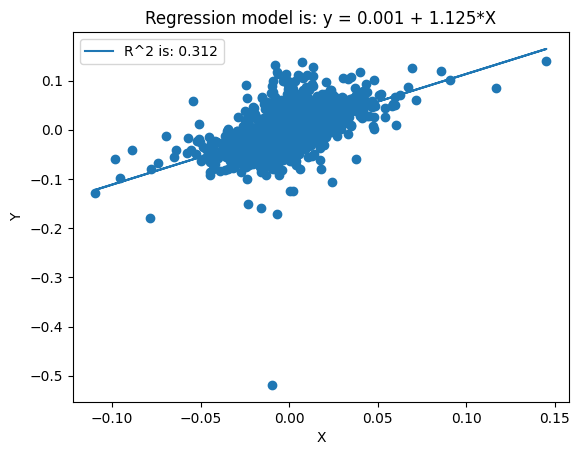

In [5]:
#------------------------------------------------------------------------------------------
# LINEAR REGRESSION MODEL (OLS) AND HYPOTHESIS TESTING
#------------------------------------------------------------------------------------------
# Creates a regression model from X and Y data
# Calculates R^2
# Null hypothesis (H0) is that parameter = 0 (no lineal dependency)
# Alternative hypothesis (H1) is that parameter not 0 (lineal dependency)
# T-distribution with n-2 degrees of freedom
#------------------------------------------------------------------------------------------

def Reg_analysis(X,Y,alpha):

    #Summary of the regression model
    X_train_lm = sm.add_constant(X)
    lm = sm.OLS(Y, X_train_lm).fit()
    print(lm.summary())

    #Linear regression:
    a = round(lm.params[0],3); b = round(lm.params[1],3)
    y = a + b*X
    R_2 = round(lm.rsquared,3)

    #Hypotesis test and statistical significance for parameters a and b 
    a_pval = lm.pvalues[0]; b_pval = lm.pvalues[1] 
    if (b_pval > alpha/2):
        print(f'Accept H0, there is no linear dependency')
    else: print(f'Accept H1, b = {b} is a good estimate, there is linear dependency')
    if(a_pval < alpha/2): print(f'Accept H1, a = {a} is a good estimate')
    else: print(f'Accept H0, a = 0')


    # Scatter plot of the data and regression line plot
    plt.scatter(X,Y); plt.xlabel('X'); plt.ylabel('Y'); 
    plt.plot(X,y, label = f'R^2 is: {R_2}'); plt.title(f'Regression model is: y = {a} + {b}*X'); plt.legend()

# EXAMPLE REGRESSION ANALYSIS: S&P returns vs AAPL returns 
import yfinance as yf
dta = yf.download(tickers = ['SPY','AAPL'], start = '2000-1-1', end = '2022-10-11', period = '1mo')
rets = dta['Adj Close'].pct_change().dropna() 
X = np.array(rets['SPY'])
Y = np.array(rets['AAPL'])
Reg_analysis(X,Y,0.05)

$$Week\,\,4:\,Multiple\,\,Regression\,\,Analysis$$
$$Regression\,\,Line:\,\,\hat{y} = a + b_{0}x_{0} + b_{1}x_{1} + ... + b_{n}x_{n}$$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     16.29
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.55e-07
Time:                        21:28:56   Log-Likelihood:                -350.15
No. Observations:                 222   AIC:                             706.3
Df Residuals:                     219   BIC:                             716.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0415      0.298      0.139      0.8

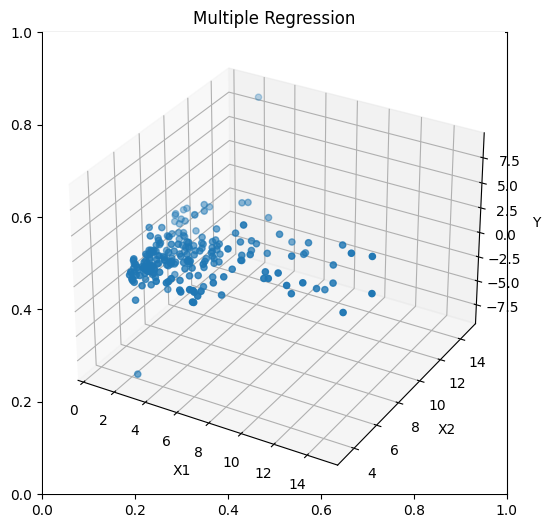

In [6]:
#------------------------------------------------------------------------------------------
# MULTIPLE LINEAR REGRESSION MODEL
#------------------------------------------------------------------------------------------
# Creates a regression model from Xo,X1,X2,...,Xn and Y data
#
#
#------------------------------------------------------------------------------------------


def Mult_Reg(X,Y,alpha):
    
    n = np.size(X[0,:])
    if n == 1: Reg_analysis(X,Y,alpha)
    else:

        #Summary of the regression model
        X_train_lm = sm.add_constant(X)
        lm = sm.OLS(Y, X_train_lm).fit()
        print(lm.summary())
        R_Adj = round(lm.rsquared_adj,3) 

        #Parameter a:
        a = round(lm.params[0],3)
        y = a

        #Parameter b:
        bn = []
        for i in range(n-1):
            b = round(lm.params[i+1],3)
            y = y + b*X[i-1,:]
            bn.append(b)

        if n == 2:
            fig = plt.figure(figsize=(6,6)); plt.title('Multiple Regression')
            ax = fig.add_subplot(projection='3d')
            ax.scatter(X[:,0], X[:,1], Y)
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')
        
        #for i in range(len(bn)): 
            #str = f'Regression Model is: y = {a} '
            #str = f'+ {bn[i]}x{i}'



#EXAMPLE MULTIPLE REGRESSION: GDP (rate of change) vs Unemployment and Inflation Rate
from matplotlib.pyplot import plot
from fredapi import Fred
import pandas as pd 
fred = Fred(api_key='6221ce64a6727c40a7cfebd499511861')
df = pd.DataFrame({'GDP':fred.get_series('GDP'), 'Inflation':fred.get_series('CORESTICKM159SFRBATL'),'Unemployment':fred.get_series('UNRATE')}).dropna()

X1 = np.array(df['Inflation'][0:-1])
X2 = np.array(df['Unemployment'][0:-1])
Y = 100*np.array(df['GDP'].pct_change().dropna())
X = np.array([X1,X2]).T
Mult_Reg(X,Y,0.05)

$$Question\,\,1$$


In [7]:
# QUESTION 1
X = np.arange(1,9)
Y = np.array([1,2,3,5,7,8,9,10])

mean_X = np.mean(X); std_X = np.std(X, ddof=1); var_X = np.var(X, ddof=1)
mean_Y = np.mean(Y); std_Y = np.std(Y, ddof=1); var_Y = np.var(Y, ddof=1)

n_outcomes = 1; t_outcomes = np.size(X); p_X = n_outcomes/t_outcomes; p_Y = p_X 
corr = np.corrcoef(X,Y)[1,0]

solution = pd.DataFrame({'Mean': [mean_X,mean_Y], 'Standar Deviation':[std_X,std_Y], 'Variance': [var_X,var_Y],
                            'Probability of each outcome':[p_X,p_Y], 'Correlation between X and Y':[corr,corr]},index = ['X','Y']).round(3)
solution

,Mean,Standar Deviation,Variance,Probability of each outcome,Correlation between X and Y
X,4.500,2.449,6.000,0.125,0.993
Y,5.625,3.378,11.411,0.125,0.993


$$Question\,\,2$$


Critical values: -2.131 and 2.131. T-statistics is t = 1.945


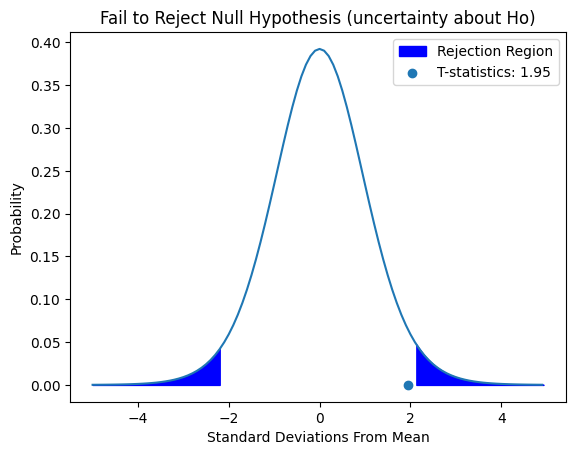

In [8]:
# QUESTION 2 
X = np.array([42,46,56,57,54,55,54,58,61,43,45,47,53,43,57,46])
mu = 48; n = np.size(X)
mean = np.mean(X); s = np.std(X, ddof=1)
t_stat = (mean-mu)*np.sqrt(n)/s
alpha1 = 0.05; alpha2 = 0.1
pd.DataFrame({'Mean':[mean], 'Standar Deviation':[s]})

# Two tail test
# Null Hypothesis (Ho): Mean of the population is equal to 48 (mu = 48)
# Alternative Hypothesis (H1): Mean of the population is not equal to 48 (mu not 48)

Ttest(s, mean, mu, n, alpha1, alternative = 'two-sided')   # CASE 1
#Ttest(s, mean, mu, n, alpha2, alternative = 'two-sided')   # CASE 2

# One tail test
# Null Hypothesis (Ho): Mean of the population is equal to 48 (mu = 48)
# Alternative Hypothesis (H1): Mean of the population is greater to 48 (mu > 48)

#Ttest(s, mean, mu, n, alpha1, alternative = 'greater')     # CASE 3


COURSEWORK2

In [9]:
# IMPORTS AND DOWNLOAD OF DATA
import numpy as np
import pandas as pd
import plotly.express as px
import yfinance as yf
import statsmodels.api as sm
import plotly.graph_objects as go

tickers = ['GOOG','META','SPOT']
df = yf.download(tickers = tickers,start='2019-11-2',end = '2022-11-2', interval='1wk').dropna().round(3)

[*********************100%***********************]  3 of 3 completed


In [10]:
# GET THE PANEL DATA
import warnings

# Ignore pandas warnings
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
data = df[['Adj Close','Volume','Open']]
data['Volume'] = np.log(data.iloc[:,1])
adj_close = data['Adj Close']; volume = data['Volume']; open = data['Open']
adj_close = adj_close['GOOG'].append(adj_close['META']).append(adj_close['SPOT'])
open = open['GOOG'].append(open['META']).append(open['SPOT'])
volume = volume['GOOG'].append(volume['META']).append(volume['SPOT'])

panel = pd.DataFrame({'Close':adj_close,'Open':open,'Volume':volume})
#panel.to_excel(r'C:\Users\Usuario\Desktop\COVENTRY\weekly.xlsx')


In [11]:
# REGRESSION ANALYSIS 

X = panel[['Open','Volume']].to_numpy()
Y = panel['Close'].to_numpy()
x = sm.add_constant(X)
lm = sm.OLS(Y,x).fit()
print(f'Close = {round(lm.params[0],3)} + {round(lm.params[1],3)}*Open + {round(lm.params[2],3)}*ln(Volume)')
print(lm.summary())

Close = -31.269 + 0.98*Open + 6.395*ln(Volume)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:29:08   Log-Likelihood:                -1821.3
No. Observations:                 474   AIC:                             3649.
Df Residuals:                     471   BIC:                             3661.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [12]:
# REMOVING HETEROSKEDASTICITY

# IMPORTS AND DOWNLOAD OF DATA
import numpy as np
import pandas as pd
import plotly.express as px
import yfinance as yf
import statsmodels.api as sm
import plotly.graph_objects as go

tickers = ['GOOG','META','SPOT']
df = yf.download(tickers = tickers,start='2019-11-2',end = '2022-11-2', interval='1mo').dropna().round(3)

# GET THE PANEL DATA
data = df[['Adj Close','Volume','Open']]
data['Volume'] = np.log(data.iloc[:,1])
adj_close = data['Adj Close'].pct_change(); volume = data['Volume']; open = data['Open'].pct_change()
adj_close = adj_close['GOOG'].append(adj_close['META']).append(adj_close['SPOT'])
open = open['GOOG'].append(open['META']).append(open['SPOT'])
volume = volume['GOOG'].append(volume['META']).append(volume['SPOT'])

panel = pd.DataFrame({'Close':adj_close,'Open':open,'Volume':volume}).iloc[1:,:].dropna()
panel.to_excel(r'C:\Users\Usuario\Desktop\COVENTRY\monthly.xlsx')

[*********************100%***********************]  3 of 3 completed


In [13]:
# REGRESSION ANALYSIS 
X = panel[['Open','Volume']].to_numpy()
Y = panel['Close'].to_numpy()
x = sm.add_constant(X)
lm = sm.OLS(Y,x).fit()
print(f'Close = {round(lm.params[0],3)} + {round(lm.params[1],3)}*Open + {round(lm.params[2],3)}*ln(Volume)')
print(lm.summary())

Close = -0.465 + -0.086*Open + 0.085*ln(Volume)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.598
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0792
Time:                        21:29:12   Log-Likelihood:                 74.955
No. Observations:                 108   AIC:                            -143.9
Df Residuals:                     105   BIC:                            -135.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [14]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
xls = r'C:\Users\Usuario\Downloads\Data for companies .xlsx'
df = pd.read_excel(xls).dropna()
data = df[['Close','ln volume','Open']]
# REGRESSION ANALYSIS 
X = data[['Open','ln volume']].to_numpy()
Y = data['Close'].to_numpy()
x = sm.add_constant(X)
lm = sm.OLS(Y,x).fit()
print(f'Close = {round(lm.params[0],3)} + {round(lm.params[1],3)}*Open + {round(lm.params[2],3)}*ln(Volume)')
print(lm.summary())
np.corrcoef(data['ln volume'],data['Open'])


Close = -0.011 + 1.006*Open + 0.003*ln(Volume)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:29:16   Log-Likelihood:                -1175.4
No. Observations:                 469   AIC:                             2357.
Df Residuals:                     466   BIC:                             2369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

array([[1.        , 0.73827176],
       [0.73827176, 1.        ]])

In [16]:
#TSLA STOCK BEHAVES AS A TECH COMPANY
import yfinance as yf
import pandas as pd
import plotly.express as px
import numpy as np

tickers = ['TSLA','META','GOOG','AAPL','NFLX','TM','F','HMC','RACE']
dta = yf.download(tickers = tickers, start = '2018-01-01',interval = '1wk')
close = dta['Adj Close'].dropna()

res = []
for i in range(len(tickers)):
    corr = np.corrcoef(close['TSLA'],close.iloc[:,i])
    res.append(corr[1][0])
tickers.reverse()
res = pd.DataFrame({'Correlation with Tesla':res},index = tickers).sort_values(by = 'Correlation with Tesla')
res

[*********************100%***********************]  9 of 9 completed


,Correlation with Tesla
TM,0.376158
AAPL,0.395932
NFLX,0.563100
GOOG,0.755376
HMC,0.808527
META,0.828072
RACE,0.922955
F,0.931524
TSLA,1.000000


In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px

dta = yf.download('MSFT')
l = 5; idx = dta.index
movavg = (1/l)*np.ones(l)
close = dta['Adj Close'].to_numpy()
y = np.convolve(close,movavg)

plot = px.line(x = idx, y = y[4:], log_y=True)
plot.show()

[*********************100%***********************]  1 of 1 completed
